# Series is ndarray-like
## methods and functions

[pandas documentattion](https://pandas.pydata.org/pandas-docs/stable/index.html) >>  
[Getting started](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) >>  
[Intro to data structures](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#) >>  
[Series](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#series)

**Series** acts very similarly to a **ndarray**,
and is a valid argument to most NumPy functions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data <class 'numpy.ndarray'>:
[-1.94382043 -2.28668272  0.60578198 -0.28525447  0.08228996  0.2290914
 -0.06395101 -0.63667875  0.04241726  0.6684989  -1.15242602]

index <class 'list'>:
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

series <class 'pandas.core.series.Series'>:
a   -1.943820
b   -2.286683
c    0.605782
d   -0.285254
e    0.082290
f    0.229091
g   -0.063951
h   -0.636679
i    0.042417
j    0.668499
k   -1.152426
dtype: float64


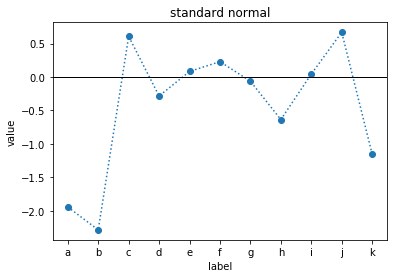

In [2]:
# Create series, when the data is a random ndarray,
# and the index is passed.

i = list('abcdefghijk')
a = np.random.randn(len(i))
s = pd.Series(a, i)

print(f'data {type(a)}:',
      f'{a}', '',
      f'index {type(i)}:',
      f'{i}', '',
      f'series {type(s)}:',
      f'{s}',
      sep='\n')

plt.plot(s, marker='o', linestyle='dotted')
plt.axhline(y=0, linewidth=1, color='black')
plt.xlabel('label')
plt.ylabel('value')
plt.title('standard normal')
plt.show()


series:
index label     value method
    0     a -1.943820       
    1     b -2.286683    min
    2     c  0.605782       
    3     d -0.285254       
    4     e  0.082290       
    5     f  0.229091       
    6     g -0.063951 median
    7     h -0.636679       
    8     i  0.042417       
    9     j  0.668499    max
   10     k -1.152426       
mean:       -0.430976
median:     -0.063951


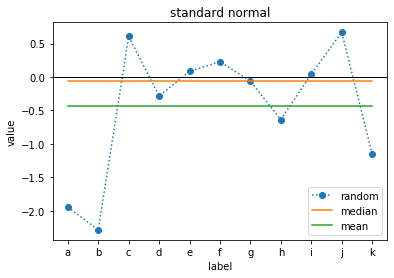

In [3]:
# Apply methods to series.

s_min = s.min()
s_max = s.max()
s_median = s.median()
s_mean = s.mean()

print('series:',
      '{:>5}{:>6}{:>10}{:>7}'.format('index', 'label', 'value', 'method'),
      sep='\n')
for k, v in enumerate(s):
    print('{:>5d}{:>6}{:>10.6f}'.format(k, s.index[k], v),
          end='')
    if v == s_median:
        m = 'median'
    elif v == s_min:
        m = 'min'
    elif v == s_max:
        m = 'max'
    else:
        m = ''
    print('{:>7}'.format(m))
print(
    '{:<11}{:>10.6f}'.format('mean:', s_mean),
    '{:<11}{:>10.6f}'.format('median:', s_median),
    sep='\n')

plt.plot(s,
         marker='o', linestyle='dotted',
         label='random')
plt.plot((s.index[0], s.index[-1]), (s_median, s_median),
         label='median')
plt.plot((s.index[0], s.index[-1]), (s_mean, s_mean),
         label='mean')
plt.axhline(y=0,
            linewidth=1, color='black')
plt.xlabel('label')
plt.ylabel('value')
plt.title('standard normal')
plt.legend()
plt.show()


series:
label index     value median
    0     a -1.943820   less
    1     b -2.286683   less
    2     c  0.605782   more
    3     d -0.285254   less
    4     e  0.082290   more
    5     f  0.229091   more
    6     g -0.063951  equal
    7     h -0.636679   less
    8     i  0.042417   more
    9     j  0.668499   more
   10     k -1.152426   less


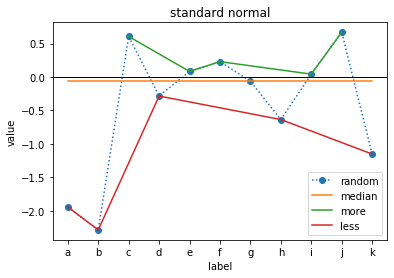

In [4]:
# Apply condition to series.

s_1 = s[s > s_median]
s_2 = s[s < s_median]

print('series:',
      '{:>5}{:>6}{:>10}{:>7}'.format('label', 'index', 'value', 'median'),
      sep='\n')
for k, v in enumerate(s):
    print('{:>5d}{:>6}{:>10.6f}'.format(k, s.index[k], v), end='')
    if v == s_median:
        c = 'equal'
    elif v in s_1.values:
        c = 'more'
    elif v in s_2.values:
        c = 'less'
    print('{:>7}'.format(c))

plt.plot(s,
         marker='o', linestyle='dotted',
         label='random')
plt.plot((s.index[0], s.index[-1]), (s_median, s_median),
         label='median')
plt.plot(s_1,
         linestyle='solid',
         label='more')
plt.plot(s_2,
         linestyle='solid',
         label='less')
plt.axhline(y=0,
            linewidth=1, color='black')
plt.xlabel('label')
plt.ylabel('value')
plt.title('standard normal')
plt.legend()
plt.show()


series:
index label     value  function
    0     a -1.943820  0.143156
    1     b -2.286683  0.101603
    2     c  0.605782  1.832685
    3     d -0.285254  0.751823
    4     e  0.082290  1.085771
    5     f  0.229091  1.257457
    6     g -0.063951  0.938051
    7     h -0.636679  0.529047
    8     i  0.042417  1.043330
    9     j  0.668499  1.951306
   10     k -1.152426  0.315870


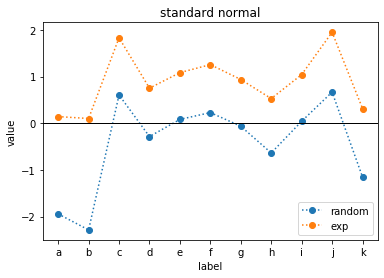

In [5]:
# Apply function to series.

s_3 = np.exp(s)

print('series:',
      '{:>5}{:>6}{:>10}{:>10}'.format('index','label','value', 'function'),
      sep='\n')
for k, v in enumerate(s):
    print('{:>5d}{:>6}{:>10.6f}{:>10.6f}'.format(k, s.index[k], v, s_3[k]))

plt.plot(s,
         marker='o', linestyle='dotted',
         label='random')
plt.plot(s_3,
         marker='o', linestyle='dotted',
         label='exp')
plt.axhline(y=0,
            linewidth=1, color='black')
plt.xlabel('label')
plt.ylabel('value')
plt.title('standard normal')
plt.legend()
plt.show()
